<b>

<p>
<center>
<font size="5">
Natural Language Processing, Fall 2020
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project -- Sentiment analysis with hotel reviews
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Team members:
Changhao Ying,
Zixuan Huang,
Ying Wang,
Chang Che
</font>
</center>
</p>

</b>

# Data Preprocessing

## Loading data

In [1]:
import sys
print(sys.executable)

/Users/yuanyuan/opt/anaconda3/bin/python


In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem.porter import *
from nltk.util import bigrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from matplotlib.dates import DateFormatter
from nltk.tokenize import TreebankWordTokenizer

# Load the raw all data
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 15)
df_raw_all = pd.read_csv('hotel.csv', header=0)
df_raw_all.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [3]:
df_raw_all['review']=df_raw_all['reviews.text']+df_raw_all['reviews.title']
df = df_raw_all[['review','reviews.rating']]
df.columns.values[1] = 'rate'
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9999 non-null   object
 1   rate    9999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


,review,rate
0,"This hotel was nice and quiet. Did not know, t...",3
1,We stayed in the king suite with the separatio...,4
2,"Parking was horrible, somebody ran into my ren...",3
3,Not cheap but excellent location. Price is som...,5
4,If you get the room that they advertised on th...,2


In [4]:
#10 best reviews
for review in list(df.sort_values('rate', axis=0,ascending = False).head(10)['review']):
    print(review)
    print('--------------------------------')

Awesome location, walking distance to great restaurants including Space Needle restaurant, spacious rooms with kitchen, hard working staff, shuttle to rail to take to the airport. When I come back to Seattle I will stay at Hyatt House again. Hyatt brand speaks for it self. DHome a way from home
--------------------------------
Still the grandest hotel in Soho with a wonderful staff from check in to check out and beyond - rooms are well appointed - bars/restaurants in hotel are fantastic - situated in the best part of the city with easy access to up and down town - cant wait to revisit this gemshelleybelly2018,Thank you for choosing our hotel and sharing your experience here on TripAdvisor. We are happy to have exceeded your expectations and appreciate your kind words regarding our property. We look forward to welcoming you in the future, please feel free to reach out to me directly should you need anything else at all. Warm regards,Megan212.965.3057mlynchsohogrand.comSoho Grand
-------

In [5]:
#10 worst reviews
for review in list(df.sort_values('rate', axis=0,ascending = True).head(10)['review']):
    print(review)
    print('--------------------------------')

We have traveled extensively prior, and have stayed at many hostels of similar price range, this one however, is a whole new experience for us. At the check in, the staff opened not with the availabilities of their facilities, but with the offer of free alcohol, every single day. What they didn't say, was that the staff themselves drank most of the free booze, and were hungover most of their shifts. The were more interested in sharing their drunken antics rather than providing any help to the customers. There was only one girl Billy who spoke English (and she's the least useful one out of them all), the rest of the staff spoke very little English and had trouble understanding us.The free alcohol turned lots of the hostel guests into violent drunks, who threw knives at each other in the kitchen whilst cooking.Hostel was extremely noisy and was impossible to sleep without earplugs. The mattress was creaky and filthy, and we didn't even dare to cover ourselves with their blankets, on whic

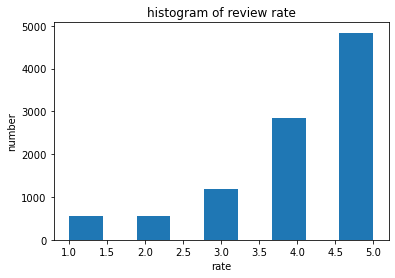

In [6]:
plt.hist(df['rate'],bins=9,rwidth=2.5)
plt.title('histogram of review rate')
plt.xlabel('rate')
plt.ylabel('number')
plt.show()

In [46]:
import string
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word.translate(str.maketrans('','', string.punctuation)) for word in text]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
df["clean"] = df["review"].apply(lambda x: clean_text(x))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuanyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yuanyuan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuanyuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,rate,clean,neg,neu,pos,compound,nb_chars,nb_words
0,"This hotel was nice and quiet. Did not know, t...",3,hotel nice quiet know train track near train p...,0.000,0.851,0.149,0.7906,237,42
1,We stayed in the king suite with the separatio...,4,stay king suite separation bedroom live space ...,0.070,0.812,0.118,0.4157,374,70
2,"Parking was horrible, somebody ran into my ren...",3,park horrible somebody run rental car stay did...,0.063,0.880,0.057,-0.0772,296,54
3,Not cheap but excellent location. Price is som...,5,cheap excellent location price somewhat standa...,0.151,0.600,0.250,0.7967,319,53
4,If you get the room that they advertised on th...,2,get room advertised website pay may luckyif st...,0.131,0.841,0.028,-0.7452,359,66


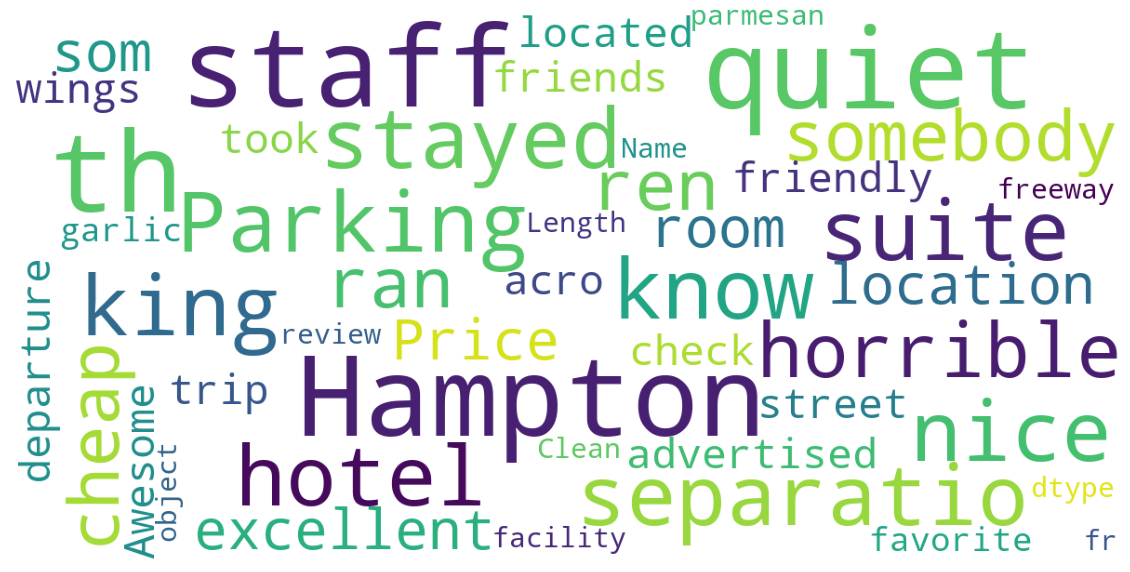

In [47]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["review"])


[(('front', 'desk'), 1548), (('room', 'clean'), 1141), (('look', 'forward'), 1069), (('take', 'time'), 977), (('staff', 'friendly'), 870), (('walk', 'distance'), 738), (('great', 'location'), 732), (('san', 'diego'), 678), (('place', 'stay'), 674), (('stay', 'hotel'), 659), (('enjoy', 'stay'), 653), (('best', 'western'), 550), (('hope', 'see'), 516), (('friendly', 'helpful'), 513), (('come', 'back'), 491), (('hotel', 'great'), 476), (('next', 'time'), 472), (('welcome', 'back'), 466), (('bed', 'comfortable'), 457), (('friendly', 'staff'), 455)]


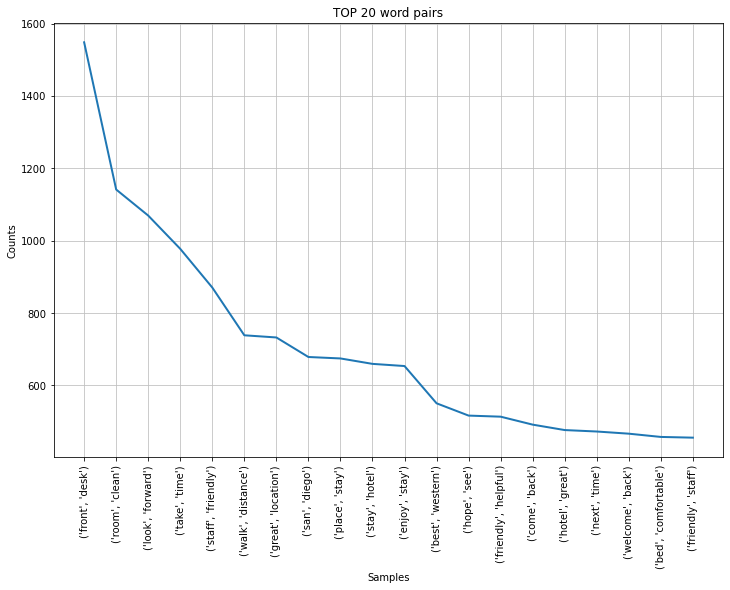

In [48]:
corpus=[]
import nltk.data
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.tokenize import TreebankWordTokenizer
treebank_tokenizer = TreebankWordTokenizer()
for text in df['clean']:
    punkt_sentences = sentence_tokenizer.tokenize(text)
    sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
    all_tokens = [word for sentence in sentences_words for word in sentence]
    corpus.extend(all_tokens)
bigrams = nltk.bigrams(corpus)
freq_bi = nltk.FreqDist(bigrams)
print(freq_bi.most_common(20))
plt.figure(figsize=(12,8))
plt.title("TOP 20 word pairs")
freq_bi.plot(20)


In [10]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['sentiments'] = df['review'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yuanyuan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,rate,clean,neg,neu,pos,compound
0,"This hotel was nice and quiet. Did not know, t...",3,hotel nice quiet know train track near train p...,0.000,0.851,0.149,0.7906
1,We stayed in the king suite with the separatio...,4,stay king suite separation bedroom live space ...,0.070,0.812,0.118,0.4157
2,"Parking was horrible, somebody ran into my ren...",3,park horrible somebody run rental car stay get...,0.063,0.880,0.057,-0.0772
3,Not cheap but excellent location. Price is som...,5,cheap excellent location price somewhat standa...,0.151,0.600,0.250,0.7967
4,If you get the room that they advertised on th...,2,get room advertised website pay may lucky.if s...,0.131,0.841,0.028,-0.7452


In [11]:
# add number of characters column
df["nb_chars"] = df["review"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["review"].apply(lambda x: len(x.split(" ")))
df.head()

,review,rate,clean,neg,neu,pos,compound,nb_chars,nb_words
0,"This hotel was nice and quiet. Did not know, t...",3,hotel nice quiet know train track near train p...,0.000,0.851,0.149,0.7906,237,42
1,We stayed in the king suite with the separatio...,4,stay king suite separation bedroom live space ...,0.070,0.812,0.118,0.4157,374,70
2,"Parking was horrible, somebody ran into my ren...",3,park horrible somebody run rental car stay get...,0.063,0.880,0.057,-0.0772,296,54
3,Not cheap but excellent location. Price is som...,5,cheap excellent location price somewhat standa...,0.151,0.600,0.250,0.7967,319,53
4,If you get the room that they advertised on th...,2,get room advertised website pay may lucky.if s...,0.131,0.841,0.028,-0.7452,359,66


In [12]:
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
3636,The staff here is horrible and the manager suc...,0.438
8718,"Employees rude, not helpful. Drugs run amuck h...",0.391
2334,"There is no fridge, no microwave, no hanger. T...",0.362
6977,"The pictures were dirty with brown stuff, the ...",0.341
6591,Very upset with my stay at this hotel. Room is...,0.333
3876,Rude clerk at check in. After a long wait! Roo...,0.328
9,"Hello, I have traveled a lot and abroad and by...",0.317
4481,"Ice machine broken, telephone broken, ice buck...",0.309
8980,MoreMoreWyndham doesn't care about needs of gu...,0.305
4132,"Infected of fleas and thumbtacks, bedbags infe...",0.302


In [13]:
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
5185,"Wow Very clean, awesome pool, awesome breakfas...",0.657
1975,The staff was very friendly and truly made my ...,0.590
8823,"Wonderful staff, friendly and helpful. Accommo...",0.583
9642,Great Hotel. Clean and comfortable. Excellent ...,0.572
7285,Beautiful hotel. The staff was friendly and he...,0.568
7254,This hotel is perfectly located on busy Duval ...,0.566
7308,Enjoyed my stay there! Always a pleasure stayi...,0.559
548,"Staff were great!! polite and professional, al...",0.549
5982,This is a great JWM. Staff was excellent - ver...,0.548
9529,Great location had a great time! recommend thi...,0.546


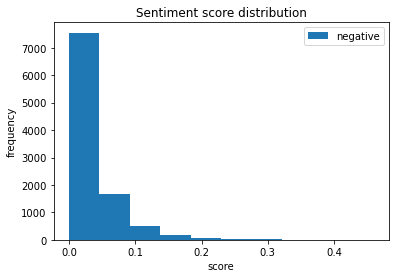

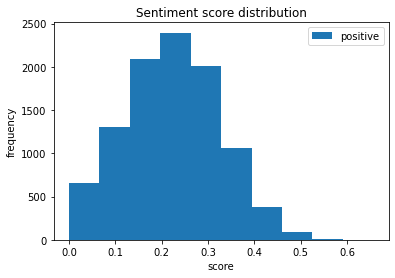

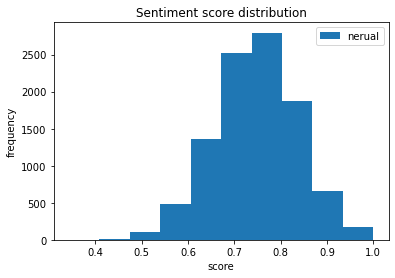

In [41]:
# plot sentiment distribution for positive and negative reviews
plt.hist(df['neg'], label="negative")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc=1)
plt.title("Sentiment score distribution")
plt.show()

plt.hist(df['pos'], label="positive")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc=1)
plt.title("Sentiment score distribution")
plt.show()

plt.hist(df['neu'], label="nerual")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc=1)
plt.title("Sentiment score distribution")
plt.show()


In [36]:
df.head()

,review,rate,clean,neg,neu,pos,compound,nb_chars,nb_words
0,"This hotel was nice and quiet. Did not know, t...",3,hotel nice quiet know train track near train p...,0.000,0.851,0.149,0.7906,237,42
1,We stayed in the king suite with the separatio...,4,stay king suite separation bedroom live space ...,0.070,0.812,0.118,0.4157,374,70
2,"Parking was horrible, somebody ran into my ren...",3,park horrible somebody run rental car stay get...,0.063,0.880,0.057,-0.0772,296,54
3,Not cheap but excellent location. Price is som...,5,cheap excellent location price somewhat standa...,0.151,0.600,0.250,0.7967,319,53
4,If you get the room that they advertised on th...,2,get room advertised website pay may lucky.if s...,0.131,0.841,0.028,-0.7452,359,66


In [16]:
'''
Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.
But why not simply counting how many times each word appears in every document? The problem with this method is 
that it doesn't take into account the relative importance of words in the texts. 
A word that appears in almost every text would not likely bring useful information for analysis. 
On the contrary, rare words may have a lot more of meanings.
The TF-IDF metric solves this problem:
TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.
'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
reviews_df = pd.concat([df, tfidf_df], axis=1)
reviews_df.head(3)

,review,rate,clean,neg,neu,pos,compound,...,word_yourself,word_yr,word_yummy,word_zaza,word_zephyr,word_zero,word_zoo
0,"This hotel was nice and quiet. Did not know, t...",3,hotel nice quiet know train track near train p...,0.000,0.851,0.149,0.7906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,We stayed in the king suite with the separatio...,4,stay king suite separation bedroom live space ...,0.070,0.812,0.118,0.4157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Parking was horrible, somebody ran into my ren...",3,park horrible somebody run rental car stay get...,0.063,0.880,0.057,-0.0772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modelling - predict review rate

In [17]:
Y=reviews_df[['rate']]
X=reviews_df.drop(reviews_df.columns[0],axis=1)
X=X.drop(X.columns[1],axis=1)
X=X.drop(X.columns[0],axis=1)
X.head()

,neg,neu,pos,compound,nb_chars,nb_words,word_aaa,...,word_yourself,word_yr,word_yummy,word_zaza,word_zephyr,word_zero,word_zoo
0,0.000,0.851,0.149,0.7906,237,42,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.070,0.812,0.118,0.4157,374,70,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.063,0.880,0.057,-0.0772,296,54,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.151,0.600,0.250,0.7967,319,53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.131,0.841,0.028,-0.7452,359,66,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Decision Tree

Classification Report: 
              precision    recall  f1-score   support

           1       0.35      0.51      0.41       108
           2       0.24      0.22      0.23       114
           3       0.23      0.26      0.24       242
           4       0.37      0.37      0.37       619
           5       0.63      0.59      0.61       917

    accuracy                           0.45      2000
   macro avg       0.36      0.39      0.37      2000
weighted avg       0.46      0.45      0.46      2000



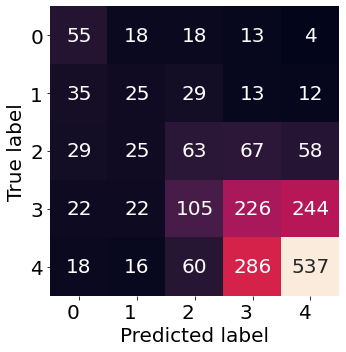

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, plot_roc_curve
res_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42).fit(x_train,y_train)
pred_dt = res_dt.predict(x_test)

print("Classification Report: ")
print(classification_report(y_test,pred_dt))

cm_dt = confusion_matrix(y_test, pred_dt)
df_cm = pd.DataFrame(cm_dt, index=['0','1','2','3','4'], columns=['0','1','2','3','4'] )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()

In [19]:
print('accuracy of decision tree', res_dt.score(x_test,y_test))

accuracy of decision tree 0.453


Random forest


In [20]:
from sklearn.ensemble import RandomForestClassifier
res_rf = RandomForestClassifier(class_weight='balanced', random_state=42).fit(x_train,y_train)

Classification Report: 
              precision    recall  f1-score   support

           1       0.58      0.71      0.64       108
           2       0.33      0.07      0.12       114
           3       0.42      0.19      0.26       242
           4       0.48      0.26      0.34       619
           5       0.60      0.91      0.72       917

    accuracy                           0.56      2000
   macro avg       0.48      0.43      0.42      2000
weighted avg       0.52      0.56      0.51      2000



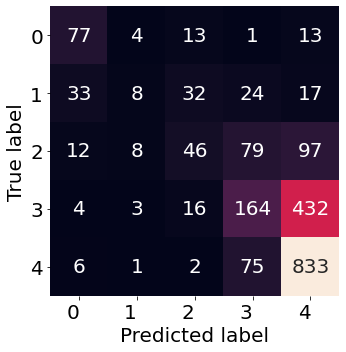

In [21]:
pred_rf=res_rf.predict(x_test)
cm_rf = confusion_matrix(y_pred = pred_rf,\
                 y_true = y_test)

print("Classification Report: ")
print(classification_report(y_test,pred_rf))

cm_rf = confusion_matrix(y_test, pred_rf)
df_cm = pd.DataFrame(cm_rf, index=['0','1','2','3','4'], columns=['0','1','2','3','4'] )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()

In [22]:
print('accuracy of random forest', res_rf.score(x_test,y_test))

accuracy of random forest 0.564


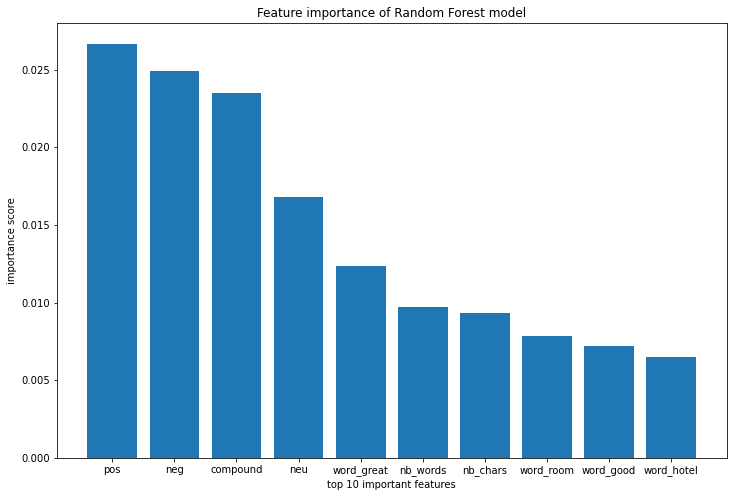

In [23]:
# print importance
features = X.columns
feature_importances_df = pd.DataFrame({"feature": features, "importance": res_rf.feature_importances_}).sort_values("importance", ascending = False)
importance_df = feature_importances_df.head(10)
x = importance_df['feature'].values
y = importance_df['importance'].values
plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.xlabel("top 10 important features")
plt.ylabel("importance score")
plt.title("Feature importance of Random Forest model")
plt.show()

Adaboost

In [24]:
x_train.head()

,neg,neu,pos,compound,nb_chars,nb_words,word_aaa,...,word_yourself,word_yr,word_yummy,word_zaza,word_zephyr,word_zero,word_zoo
0,0.000,0.851,0.149,0.7906,237,42,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.070,0.812,0.118,0.4157,374,70,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.063,0.880,0.057,-0.0772,296,54,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.151,0.600,0.250,0.7967,319,53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.131,0.841,0.028,-0.7452,359,66,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Classification Report: 
              precision    recall  f1-score   support

           1       0.55      0.55      0.55       108
           2       0.30      0.31      0.31       114
           3       0.32      0.26      0.29       242
           4       0.42      0.27      0.33       619
           5       0.62      0.80      0.70       917

    accuracy                           0.53      2000
   macro avg       0.44      0.44      0.43      2000
weighted avg       0.50      0.53      0.51      2000



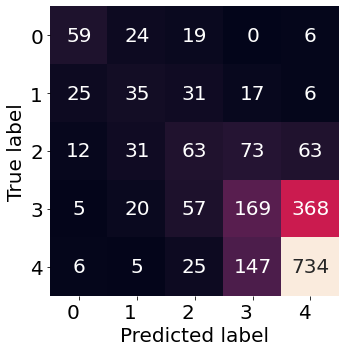

accuracy of adaboosting 0.53


In [25]:
from sklearn.ensemble import AdaBoostClassifier
res_ada = AdaBoostClassifier(random_state=42)
res_ada.fit(x_train, y_train)
pred_ada = res_ada.predict(x_test)


print("Classification Report: ")
print(classification_report(y_test,pred_ada))


cm_ada = confusion_matrix(y_test, pred_ada)
df_cm = pd.DataFrame(cm_ada, index=['0','1','2','3','4'], columns=['0','1','2','3','4'] )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()

print('accuracy of adaboosting', res_ada.score(x_test,y_test))

LDA

Classification Report: 
              precision    recall  f1-score   support

           1       0.56      0.58      0.57       108
           2       0.22      0.25      0.23       114
           3       0.27      0.33      0.30       242
           4       0.46      0.43      0.44       619
           5       0.68      0.65      0.66       917

    accuracy                           0.52      2000
   macro avg       0.44      0.45      0.44      2000
weighted avg       0.53      0.52      0.52      2000



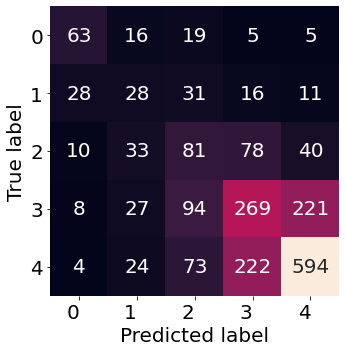

accuracy of LDA 0.5175


In [26]:
res_lda = LinearDiscriminantAnalysis()
res_lda.fit(x_train, y_train)
pred_lda = res_lda.predict(x_test)

print("Classification Report: ")
print(classification_report(y_test,pred_lda))


cm_lda = confusion_matrix(y_test, pred_lda)
df_cm = pd.DataFrame(cm_lda, index=['0','1','2','3','4'], columns=['0','1','2','3','4'] )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()


print('accuracy of LDA', res_lda.score(x_test,y_test))

QDA

Classification Report: 
              precision    recall  f1-score   support

           1       0.13      0.06      0.08       108
           2       0.11      0.25      0.16       114
           3       0.00      0.00      0.00       242
           4       0.25      0.00      0.00       619
           5       0.48      0.89      0.62       917

    accuracy                           0.42      2000
   macro avg       0.19      0.24      0.17      2000
weighted avg       0.31      0.42      0.30      2000



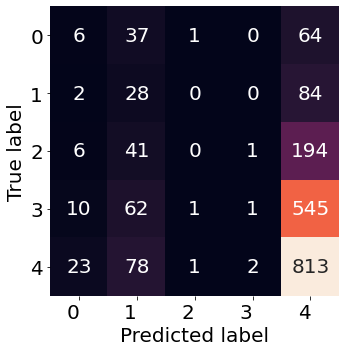

accuracy of QDA 0.424


In [27]:
res_qda = QuadraticDiscriminantAnalysis()
res_qda.fit(x_train, y_train)
pred_qda = res_qda.predict(x_test)


print("Classification Report: ")
print(classification_report(y_test,pred_qda))


cm_qda = confusion_matrix(y_test, pred_qda)
df_cm = pd.DataFrame(cm_qda, index=['0','1','2','3','4'], columns=['0','1','2','3','4'] )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()


print('accuracy of QDA', res_qda.score(x_test,y_test))

MLP

In [28]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten,AvgPool1D, \
BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model as lm
from sklearn.metrics import cohen_kappa_score, f1_score
from sklearn.metrics import classification_report
from keras.utils import to_categorical

In [29]:
y_train['rate'] = y_train['rate'].astype(int)
y_test['rate'] = y_test['rate'].astype(int)

In [30]:
y_train2=pd.get_dummies(y_train.rate, sparse=True)
y_test2=pd.get_dummies(y_test.rate, sparse=True)
y_test2.head()

,1,2,3,4,5
8000,0,0,0,1,0
8001,0,0,0,0,1
8002,0,1,0,0,0
8003,0,0,0,0,1
8004,0,0,0,0,1


In [31]:
from keras.optimizers import Adam,SGD
model = Sequential()
model.add(Dense(128, input_dim=3676, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('MLP.h5', monitor='val_loss', mode='max', verbose=1, save_best_only=True)
model.fit(x_train, y_train2, validation_data=(x_test, y_test2), batch_size=2, epochs=2000,callbacks=[es, mc])


Epoch 1/2000
3989/4000 [============================>.] - ETA: 0s - loss: 1.4655 - accuracy: 0.4888
Epoch 00001: val_loss improved from -inf to 1.30454, saving model to MLP.h5
4000/4000 [==============================] - 8s 2ms/step - loss: 1.4658 - accuracy: 0.4886 - val_loss: 1.3045 - val_accuracy: 0.4585
Epoch 2/2000
3997/4000 [============================>.] - ETA: 0s - loss: 1.2888 - accuracy: 0.4904
Epoch 00002: val_loss did not improve from 1.30454
4000/4000 [==============================] - 8s 2ms/step - loss: 1.2889 - accuracy: 0.4903 - val_loss: 1.3033 - val_accuracy: 0.4585
Epoch 3/2000
3993/4000 [============================>.] - ETA: 0s - loss: 1.2867 - accuracy: 0.4902
Epoch 00003: val_loss did not improve from 1.30454
4000/4000 [==============================] - 8s 2ms/step - loss: 1.2868 - accuracy: 0.4903 - val_loss: 1.3005 - val_accuracy: 0.4585
Epoch 4/2000
3996/4000 [============================>.] - ETA: 0s - loss: 1.2876 - accuracy: 0.4901
Epoch 00004: val_loss d

In [32]:
print("Final accuracy on test set:", 100*model.evaluate(x_test, y_test2)[1], "%")

63/63 [==============================] - 0s 2ms/step - loss: 1.3000 - accuracy: 0.4585
Final accuracy on test set: 45.84999978542328 %


In [33]:
pred_mlp = model.predict(x_test)
pred_mlp

array([[0.05930821, 0.05644284, 0.11814379, 0.27713704, 0.48896813],
       [0.05930821, 0.05644284, 0.11814379, 0.27713704, 0.48896813],
       [0.05930821, 0.05644284, 0.11814379, 0.27713704, 0.48896813],
       ...,
       [0.05930821, 0.05644284, 0.11814379, 0.27713704, 0.48896813],
       [0.05930821, 0.05644284, 0.11814379, 0.27713704, 0.48896813],
       [0.05930821, 0.05644284, 0.11814379, 0.27713704, 0.48896813]],
      dtype=float32)

In [34]:
y_test2.head()

,1,2,3,4,5
8000,0,0,0,1,0
8001,0,0,0,0,1
8002,0,1,0,0,0
8003,0,0,0,0,1
8004,0,0,0,0,1
